#**<font color='green'>Clase 1: Explorando Datos</font>**

In [73]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt


print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')


Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [74]:
datos = pd.read_csv('/content/flights.csv')

datos.shape

(71175, 11)

In [75]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [76]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


* **El método describe es una herramienta poderosa que proporciona estadísticas descriptivas de un conjunto de datos. Este método calcula varias estadísticas resumidas a la vez, incluyendo el .```conteo (número de elementos).```, .```media.```, .```desviación estándar (medida de dispersión de los datos).```, .```mínimo (el valor más bajo).```, .```los cuartiles (25%, 50% y 75% - correspondientes al primer cuartil, mediana y tercer cuartil, respectivamente).``` y .```el máximo (el valor más alto).```. Además, es posible obtener las estadísticas descriptivas para las variables categóricas: df.```describe(include=['O'])```.**-

In [77]:
#Variables Numericas
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [78]:
# Variables Categoricas
datos.describe(include=['O'])

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


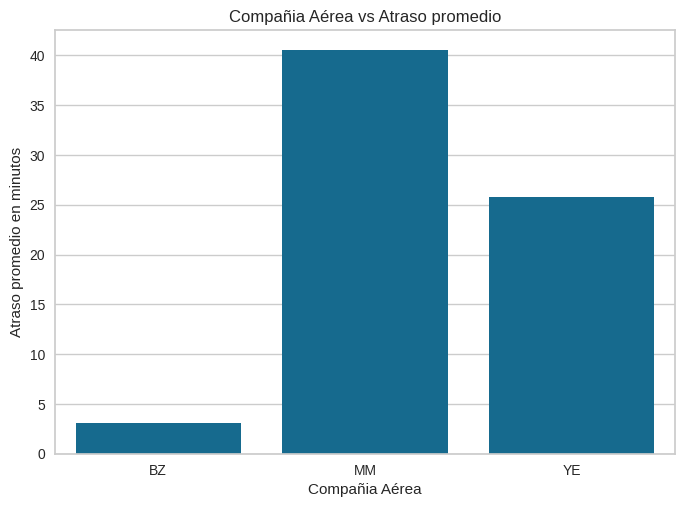

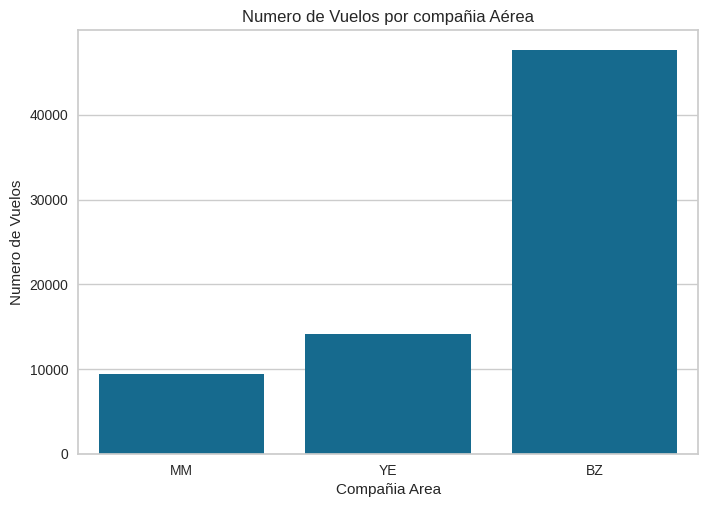

In [79]:
#Graficar los Datos
avg_delay = datos.groupby('airline')['delay'].mean().reset_index()

sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañia Aérea vs Atraso promedio')
plt.xlabel('Compañia Aérea')
plt.ylabel('Atraso promedio en minutos')

plt.show();

#Vamos a Crear un grafico que nos permita ver el # de Vuelos por compañia area

sns.countplot(data=datos, x='airline')
plt.title('Numero de Vuelos por compañia Aérea')
plt.xlabel('Compañia Area')
plt.ylabel('Numero de Vuelos')

plt.show();

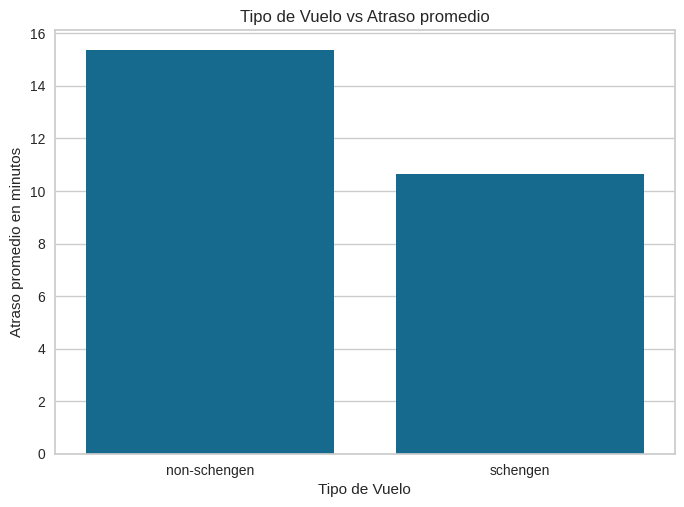

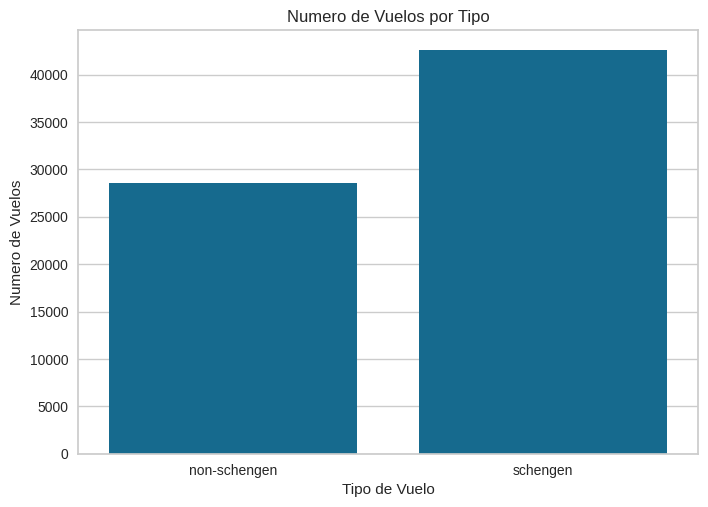

In [80]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()

sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de Vuelo vs Atraso promedio')
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Atraso promedio en minutos')

plt.show();

# 2do Grafico

sns.countplot(data=datos, x='schengen')
plt.title('Numero de Vuelos por Tipo')
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Numero de Vuelos')

plt.show();

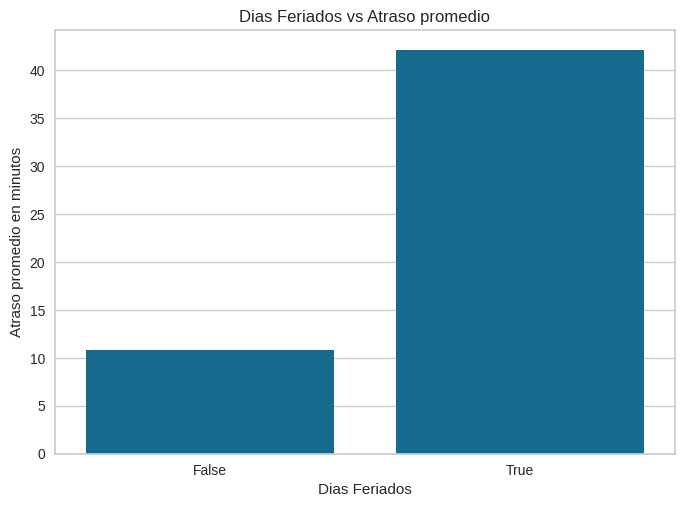

In [81]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()

sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Dias Feriados vs Atraso promedio')
plt.xlabel('Dias Feriados')
plt.ylabel('Atraso promedio en minutos')

plt.show();

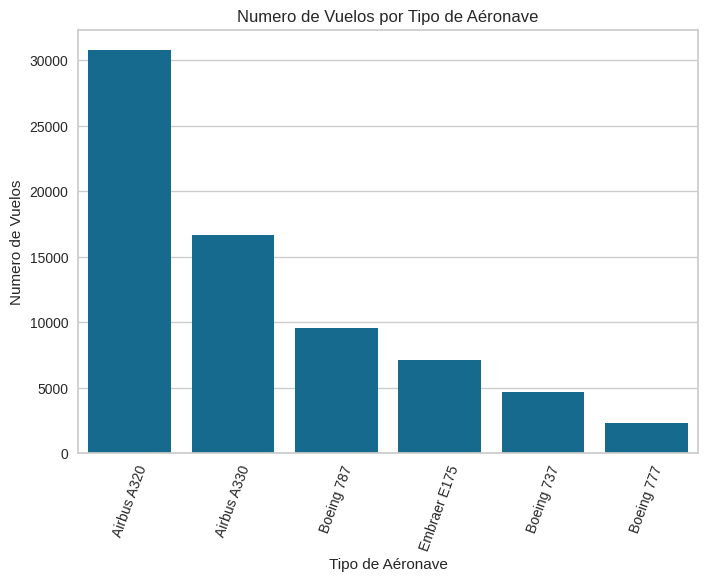

In [82]:
# Ordena las aeronaves en un indice
order = datos['aircraft_type'].value_counts().index

sns.countplot(data=datos, x='aircraft_type', order=order)
plt.title('Numero de Vuelos por Tipo de Aéronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de Aéronave')
plt.ylabel('Numero de Vuelos')

plt.show();

<Axes: xlabel='arrival_time', ylabel='Count'>

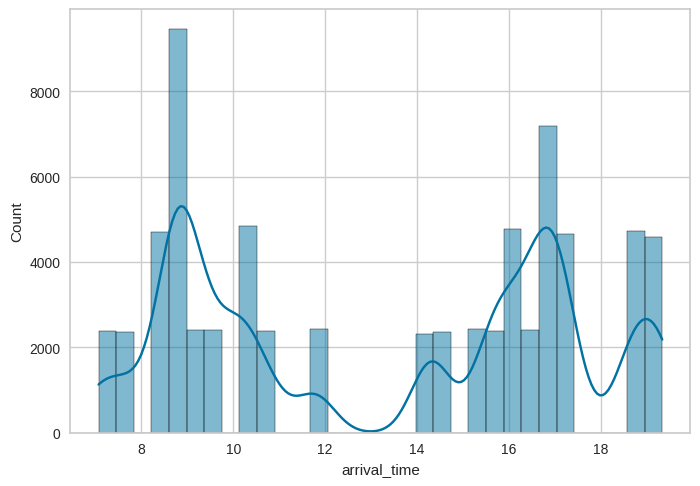

In [83]:
#Creando un Histograma

sns.histplot(data=datos, x='arrival_time', kde=True)

##* Funcion que nos ayuda establecer el Rango intercuantil

In [84]:
def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna], [75,25])
  iqr = q75 - q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

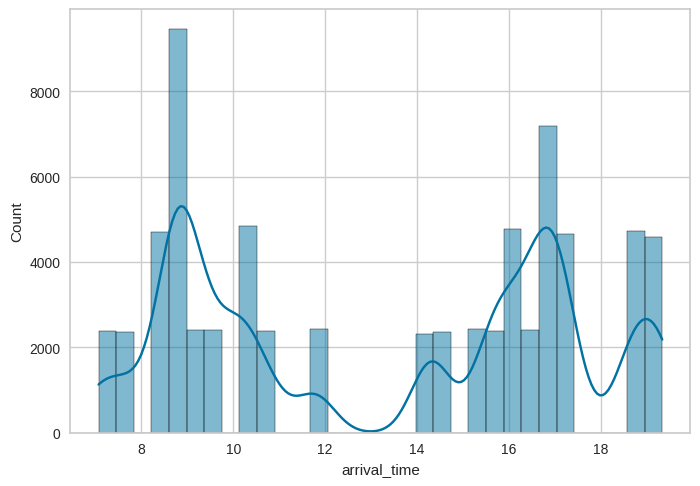

In [85]:
#Horario de Llegada
binwidth = ancho_bin(datos, 'arrival_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth=binwidth);

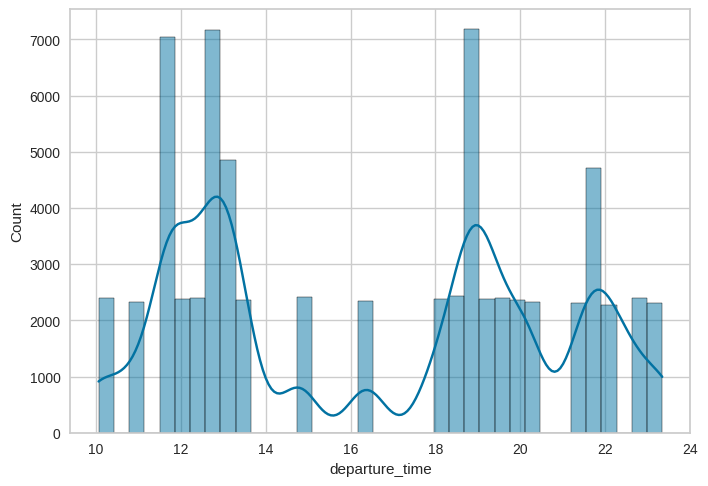

In [86]:
# Horario de Salida
binwidth = ancho_bin(datos, 'departure_time')
sns.histplot(data=datos, x='departure_time', kde=True, binwidth=binwidth);

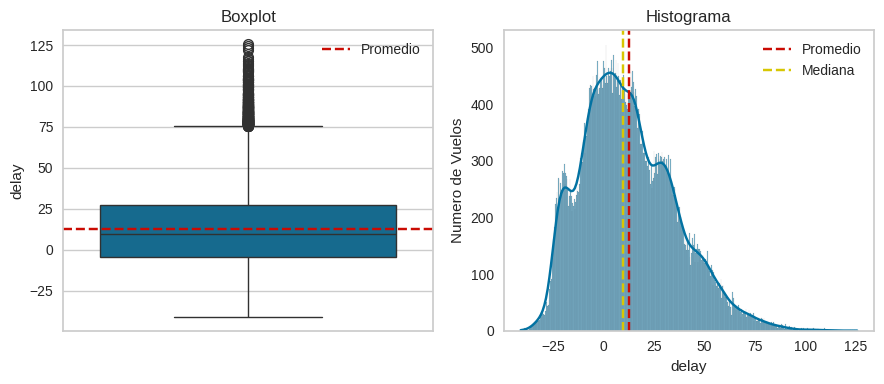

In [87]:
from matplotlib.lines import lineStyles
from ipywidgets.widgets.widget_int import Color
# Retraso de los Vuelos

atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

# Grafico Boxplot

fig, ax = plt.subplots(1,2, figsize=(9,4))

sns.boxplot(data=datos, y='delay', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('Numero de Vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()

plt.show();

#**<font color='green'>Clase 2: Feature Engineering</font>**



El feature engineering es un concepto fundamental en el campo de la ciencia de datos y el aprendizaje automático, y desempeña un papel crucial en el proceso de desarrollo de modelos predictivos y analíticos. Esta técnica implica la creación, transformación y selección de variables, también conocidas como "features", a partir de los datos brutos disponibles, con el fin de mejorar el rendimiento de los modelos. Pero, ¿qué serían features?

**¿Qué son las features?**

Las features son las variables o atributos que un modelo de machine learning utiliza para hacer predicciones o clasificaciones. Representan la información que el modelo tiene a su disposición para aprender patrones en los datos. Por ejemplo, si estamos construyendo un modelo para predecir el precio de una casa, las features pueden incluir el número de habitaciones, la superficie en metros cuadrados, la ubicación geográfica, la proximidad a escuelas, entre otras.

**La importancia del Feature Engineering:**

* Mejora el rendimiento del modelo: Elegir las features correctas y transformarlas adecuadamente puede resultar en modelos más precisos y eficientes. Features bien diseñadas pueden capturar información relevante y eliminar ruido en los datos.

* Reduce la dimensionalidad: En conjuntos de datos con muchas features, la dimensionalidad de los datos puede convertirse en un problema. El feature engineering puede ayudar a reducir la cantidad de features, manteniendo solo aquellas que son realmente informativas para el modelo.

**Técnicas de Feature Engineering:**

*Existen varias técnicas de feature engineering, incluyendo:*

* Creación de features: Esto implica la creación de nuevas features basadas en las existentes. Por ejemplo, combinar las features de superficie y valor de una propiedad para crear una feature que represente el valor por metro cuadrado de esa propiedad. O, si tienes datos de fecha y hora, puedes crear una nueva característica que represente el día de la semana. Esto puede ser útil porque tal vez haya patrones que ocurren en días específicos de la semana.

* Transformación de features: Se pueden aplicar funciones matemáticas a las features existentes para hacerlas más adecuadas para el modelo. Ejemplos incluyen aplicar logaritmos o escalar valores para reducir la escala en la que se encuentra la variable.

* Selección de features: No todas las features son igualmente importantes. La selección de features implica identificar y mantener solo las más relevantes para el problema en cuestión.



In [88]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

##* **Creando Nuevas Columnas**

In [89]:
# Se Crea Una columna 'Date' en el Dataframe,
# apartir de la columna 'day' y 'year'

datos['Date'] = datos['year'].astype(str) + '-' + (datos['day']+1).astype(str)
datos['Date'] = pd.to_datetime(datos['Date'], format='%Y-%j')
datos.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,Date
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277,2022-12-31
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348,2022-12-31
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080,2022-12-31
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [90]:
# Se Crea una columna 'is_weekend' que diga si es fin de semana o no
# apartir de la columna 'Date'

datos['is_weekend'] = datos['Date'].dt.weekday.isin([5,6])

In [91]:
# Se Crea una columna 'day_name', nomnbre del dia de la semana
# apartir de la columna 'Date'

datos['day_name'] = datos['Date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,Date,is_weekend,day_name
56924,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,144,2020,False,2.086111,2020-05-24,True,Sunday
36451,4,BZ,Airbus A330,schengen,TCY,11.781391,14.781391,240,2016,False,-19.513091,2016-08-28,True,Sunday
39579,24,BZ,Airbus A320,schengen,FJB,9.668655,12.668655,83,2017,False,33.972319,2017-03-25,True,Saturday
23437,22,YE,Airbus A320,non-schengen,MWL,8.794147,11.794147,102,2014,False,10.111659,2014-04-13,True,Sunday
7631,21,BZ,Boeing 737,schengen,FJB,7.065594,10.065594,143,2011,False,4.469236,2011-05-24,False,Tuesday


In [92]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  Date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

## Datos Codificados
* Vamos hacer las modificacion a las Variables de cadenas de caracteres

In [93]:
datos['schengen'].unique()

array(['non-schengen', 'schengen'], dtype=object)

In [94]:
datos['is_holiday'].unique()

array([False,  True])

In [95]:
datos['is_weekend'].unique()

array([False,  True])

In [96]:
# Reemplaza por 0 y 1
datos['schengen'] = datos['schengen'].replace({'non-schengen':0, 'schengen':1}).astype(int)
datos['is_holiday'] = datos['is_holiday'].replace({False:0, True:1}).astype(int)
datos['is_weekend'] = datos['is_weekend'].replace({False:0, True:1}).astype(int)

/tmp/ipython-input-2623411942.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['schengen'] = datos['schengen'].replace({'non-schengen':0, 'schengen':1}).astype(int)
/tmp/ipython-input-2623411942.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['is_holiday'] = datos['is_holiday'].replace({False:0, True:1}).astype(int)
/tmp/ipython-input-2623411942.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_o

In [97]:
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,Date,is_weekend,day_name
40381,30,BZ,Embraer E175,1,PUA,8.923441,12.923441,137,2017,0,-0.170041,2017-05-18,0,Thursday
35041,23,YE,Embraer E175,1,TCY,18.801235,21.801235,146,2016,0,27.530921,2016-05-26,0,Thursday
62636,4,BZ,Airbus A330,1,TCY,11.781391,14.781391,160,2021,0,-1.302844,2021-06-10,0,Thursday
20711,6,YE,Boeing 787,1,AUZ,17.033688,19.033688,285,2013,0,-4.345971,2013-10-13,1,Sunday
3873,4,BZ,Airbus A330,1,TCY,11.781391,14.781391,258,2010,0,3.331556,2010-09-16,0,Thursday


## **Creando la lista de las Variables Categoricas**

In [98]:
categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

## Metodo pandas que nos permite codificar nuestras Variables con 0 y 1 de forma numerica ```pd.get_dummies()```

In [99]:
pd.get_dummies(data=datos, columns=categoricas, dtype=int).head(3)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,Date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0


In [100]:
# Almacenando en una variable
datos_codificados = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,Date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
52572,18,1,14.258911,20.258911,219,2019,0,-13.084567,2019-08-08,0,...,0,1,0,0,0,0,0,1,0,0
53582,10,0,8.939996,11.939996,287,2019,0,34.064251,2019-10-15,0,...,1,0,0,0,0,0,0,0,1,0
13705,21,1,7.065594,10.065594,183,2012,0,6.797736,2012-07-02,0,...,0,0,0,0,1,0,0,0,0,0
56929,16,0,17.041281,20.041281,145,2020,0,51.294148,2020-05-25,0,...,0,0,0,0,1,0,0,0,0,0
50485,22,0,8.794147,11.794147,80,2019,0,11.650003,2019-03-22,0,...,0,0,0,1,0,0,0,0,0,0


## El horario de salida y el horario de llegada, los datos se parecen mucho, para corroborar esto, utilizamos un metodo de pandas: ```.corr()```

In [101]:
datos[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


Hay una correlacion casi 100%, osea inversamente proporcional, mientras una aumenta la otra decrese proporcionalmente.

Y esto puede sesgar el modelo, por eso solo se debe dejar una sola.
******************************

Ahora procedemos e eliminar tambien las columnas que no nos sirven por ejemplo: flight_id, y las que usamos para crear las nuevas columnas

In [102]:
df = datos_codificados.drop(columns=['flight_id', 'departure_time', 'day', 'year', 'Date'])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
48477,1,18.801235,0,7.302744,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
56481,1,18.635384,0,-20.371351,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
29216,1,14.376052,1,30.425406,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
13273,1,14.376052,0,14.238448,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
733,1,7.708301,0,3.942294,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
40590,0,16.718722,0,8.512702,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6883,0,10.733469,0,-18.680761,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
18243,1,15.729617,0,-2.275450,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
46461,1,16.909690,1,49.244388,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
15746,0,19.341235,0,7.247497,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#**<font color='green'>Clase 3: Seleccion y Validacion del Modelo</font>**

##**Definiendo una Baseline**

---
https://scikit-learn.org/stable/


In [103]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [104]:
# 'X' nuestras variables independientes
X = df.drop(['delay'], axis=1)

# 'y' Variable de respuesta
y = df['delay']

# Segregar el modelo
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)



In [105]:
# Modelo de baseline
baseline = DummyRegressor()
baseline.fit(X_train, y_train) # Entreanamos nuestro modelo

DummyRegressor()

In [109]:
# Vamos a evaluar el modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_dummy = baseline.predict(X_test)

def calcular_metricas_regresion(y_test, y_pred):
  rmse = mean_squared_error(y_test, y_pred)
  # Error absoluto promedio
  mae = mean_absolute_error(y_test, y_pred)
  # R²
  r2 = r2_score(y_test, y_pred)
  # Crear Diccionario
  metricas = {
      'Raiz del Error Cuadratico Medio (RMSE)': round(rmse**(1/2), 4),
      'Error Absoluto Medio (MAE)': round(mae, 4),
      'R² Score': round(r2, 4)
  }
  return metricas



In [110]:
resultados_baseline = calcular_metricas_regresion(y_test, y_pred_dummy)
resultados_baseline

{'Raiz del Error Cuadratico Medio (RMSE)': 23.1612,
 'Error Absoluto Medio (MAE)': 18.5646,
 'R² Score': -0.0}

* **Este modelo no esta generalizando correctamente**

# **<font color='orange'>Para saber más: métricas utilizadas en regresión</font>**

Durante el video, se presentaron algunas de las métricas más comunes para evaluar modelos de regresión, como RMSE, MAE y R2. Junto con estas métricas, existen diversas otras que pueden ser bastante útiles durante la evaluación de un modelo de regresión. A continuación, podrás encontrar algunas de las métricas más utilizadas y sus traducciones en español:

* Mean squared error - MSE (Error Cuadrático Medio);
* Mean absolute error - MAE (Error Absoluto Medio);
* Root Mean Squared Error - RMSE (Raíz Cuadrada del Error Cuadrático Medio);
* Mean Squared Logarithmic Error - MSLE (Error Logarítmico Cuadrático Medio); y
* Mean Absolute Percentage Error - MAPE (Porcentaje del Error Absoluto Medio).

**<font color='orange'>Mean squared error - MSE</font>**

El Mean Squared Error (MSE), o Error Cuadrático Medio, es una métrica ampliamente utilizada para evaluar el rendimiento de un modelo de aprendizaje automático. Esta métrica calcula la media de los errores cuadrados, donde cada error es la diferencia entre el valor previsto por el modelo y el valor real. La elevación al cuadrado da mayor peso a los errores mayores, lo que puede ser útil cuando esos errores son particularmente indeseables. El MSE se define matemáticamente como:


<img src="https://raw.github.com/LejImkoaj/IA-aumentada/main/metrica-mse.webp" width="80%">


En esta fórmula, "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MSE se calcula tomando la diferencia entre los valores reales y los valores predichos, elevando al cuadrado, sumando todas estas diferencias al cuadrado y, a continuación, dividiendo por el número de observaciones "n".

Para evaluar la calidad de un modelo usando el MSE, cuanto más cerca de 0 esté el valor del MSE, mejor estará el modelo en predecir los valores deseados. Esto se debe a que un MSE de 0 indica que no hay diferencia entre los valores previstos y los valores reales, es decir, el modelo está haciendo predicciones perfectas.

Aunque el MSE es una métrica útil, vale la pena mencionar que tiene la desventaja de dar más peso a los outliers debido al cuadrado de cada término. Esto puede ser indeseable en muchos casos, llevando a los investigadores a usar alternativas, como el error absoluto medio (MAE).


**<font color='orange'>Mean absolute error - MAE</font>**

El Error Absoluto Medio (MAE) es una medida de error común utilizada en modelos de regresión. Se calcula tomando la media de los valores absolutos de los errores. En otras palabras, para cada punto de datos, primero calculamos el error (la diferencia entre el valor predicho y el valor real), tomamos el valor absoluto de ese error (para asegurar que todos los errores sean positivos), y luego calculamos la media de todos estos errores absolutos. El MAE se define como:


<img src="https://raw.github.com/LejImkoaj/IA-aumentada/main/metrica-mae.webp" width="80%">


En esta ecuación, "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MAE se calcula tomando la diferencia absoluta entre los valores reales y los valores predichos para todas las observaciones, sumando estas diferencias absolutas y, a continuación, dividiendo por el número de observaciones "n".

El MAE es similar a la Métrica del Error Cuadrático Medio (MSE), pero en lugar de elevar los errores al cuadrado, simplemente toma el valor absoluto de los errores. Esto hace que el MAE sea menos sensible a outliers que el MSE, ya que los errores grandes no se amplifican por el cuadrado.

Al evaluar modelos de regresión con el MAE, un valor menor indica un modelo más preciso. En otras palabras, cuanto menor sea el MAE, mejor será el modelo en predecir el valor correcto para nuevos datos. El MAE tiene un límite inferior de 0, que indica un modelo perfecto (es decir, todas las predicciones son exactas).

Cabe destacar que, aunque el MAE es una métrica útil, no debe ser la única métrica utilizada para evaluar el rendimiento de un modelo de regresión. Otras métricas, como el MSE, la Raíz Cuadrada del Error Cuadrático Medio (RMSE) y el Coeficiente de Determinación (R2), también deben ser consideradas para obtener una evaluación completa de la capacidad de un modelo para hacer predicciones precisas.


**<font color='orange'>Root Mean Squared Error - RMSE</font>**

La Raíz Cuadrada del Error Cuadrático Medio (RMSE) es una métrica de evaluación comúnmente utilizada en modelos de regresión, que es esencialmente la raíz cuadrada del MSE (Error Cuadrático Medio). El RMSE se calcula tomando la raíz cuadrada de la media de los errores cuadrados, que son las diferencias entre los valores previstos y los valores reales, elevadas al cuadrado. Matemáticamente, el RMSE se define como:


<img src="https://raw.github.com/LejImkoaj/IA-aumentada/main/metrica-rmse.webp" width="80%">

Donde:

    n es el número de muestras;
    Ŷ_j es la predicción del modelo para la muestra j;
    Y_j es el valor real para la muestra j.

El RMSE es una medida de la dispersión de los residuos (errores de predicción) y, al igual que el MSE, penaliza los errores mayores de forma más severa que los errores menores, debido al hecho de elevar al cuadrado las diferencias. Esto lo hace particularmente sensible a grandes errores.

Un valor menor de RMSE indica un mejor ajuste del modelo a los datos, es decir, las predicciones del modelo están más cerca de los valores reales. Es importante resaltar que, aunque el RMSE es una métrica útil, no debe ser la única métrica considerada al evaluar la calidad de un modelo de regresión.

**<font color='orange'>Mean Squared Logarithmic Error - MSLE</font>**

El Error Logarítmico Cuadrático Medio es una métrica de evaluación utilizada en problemas de predicción donde la escala de los valores objetivo o de las predicciones varía significativamente y los errores relativos son más importantes que los errores absolutos. El MSLE mide el error cuadrático medio entre los logaritmos naturales de los valores reales y los logaritmos naturales de las predicciones. Matemáticamente, se puede definir el MSLE de la siguiente manera:


<img src="https://raw.github.com/LejImkoaj/IA-aumentada/main/metrica-msle.webp" width="80%">

Donde "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MSLE se calcula tomando el logaritmo natural de los valores reales y predichos sumados a 1, calculando la diferencia entre estos logaritmos, elevando al cuadrado, sumando todas estas diferencias al cuadrado y, a continuación, dividiendo por el número de observaciones "n".

El principal punto de enfoque de esta métrica es medir la diferencia relativa entre los valores esperados y los predichos por el modelo, es decir, verifica la diferencia porcentual entre ellos. De modo que, pequeñas diferencias entre valores pequeños son tratadas igualmente a grandes diferencias entre valores grandes, a diferencia de lo que ocurre en el MSE, como se muestra en el siguiente ejemplo:

<img src="https://raw.github.com/LejImkoaj/IA-aumentada/main/diferencia-mse-msle.png" width="70%">

Esto nos muestra que las grandes diferencias entre los valores reales y predichos tienen poca variación en el resultado final de la métrica. Por lo tanto, esta métrica se utiliza más cuando no deseamos que grandes errores sean significativamente más penalizados que errores pequeños.


**<font color='orange'>Mean Absolute Percentage Error - MAPE</font>**


El Mean Absolute Percentage Error es muy similar al Mean Absolute Error - MAE, con la diferencia de que mide la precisión como un porcentaje y puede ser calculado como el porcentaje del MAE para cada muestra. El MAPE se utiliza mucho en problemas de regresión, ya que proporciona una interpretación bastante intuitiva sobre el error relativo. La definición del MAPE es:

<img src="https://raw.github.com/LejImkoaj/IA-aumentada/main/metrica-mape.webp" width="80%">

Donde "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación, "ŷ_i" es el valor predicho para la i-ésima observación, y el MAPE se calcula como la media de los porcentajes absolutos de las diferencias entre los valores reales y los valores predichos en relación con los valores reales. El resultado se multiplica por 100% para expresar el error como un porcentaje.

El MAPE se utiliza frecuentemente como una métrica de error para evaluar la precisión de las predicciones en problemas de predicción y se expresa como un porcentaje del error medio absoluto en relación con los valores reales.

In [112]:
from sklearn.dummy import DummyRegressor

estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_metricas_regresion(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estrategia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")


Estrategia: mean
Raiz del Error Cuadratico Medio (RMSE): 23.1612
Error Absoluto Medio (MAE): 18.5646
R² Score: -0.0


Estrategia: median
Raiz del Error Cuadratico Medio (RMSE): 23.3446
Error Absoluto Medio (MAE): 18.4452
R² Score: -0.0159


Estrategia: quantile
Raiz del Error Cuadratico Medio (RMSE): 28.7554
Error Absoluto Medio (MAE): 22.0248
R² Score: -0.5414


Estrategia: constant
Raiz del Error Cuadratico Medio (RMSE): 23.3079
Error Absoluto Medio (MAE): 18.4449
R² Score: -0.0127




El <font color='orange'>DummyRegressor</font> es una clase de scikit-learn que permite la creación de un modelo simple de referencia (o baseline) para comparación con modelos más complejos. Este modelo no toma en cuenta los datos de entrada y hace predicciones basadas en una estrategia simple especificada.

Las estrategias utilizadas en este código son: <font color='orange'>"mean", "median", ("quantile", 0.25), ("constant", 10.0)</font>. Cada una de estas estrategias define cómo el DummyRegressor hace sus predicciones:

* <font color='orange'>"mean":</font> predice la media de los valores de entrenamiento.
* <font color='orange'>"median":</font> predice la mediana de los valores de entrenamiento.
* <font color='orange'>"quantile":</font> predice un cuantil específico de los valores de entrenamiento. En el caso de este código, se utiliza el cuantil 0.25.
* <font color='orange'>"constant":</font> predice un valor constante especificado. En el caso de este código, se utiliza el valor 10.0.

El código recorre cada una de estas estrategias en un bucle, entrenando un DummyRegressor con la estrategia correspondiente y evaluando su desempeño utilizando un conjunto de métricas de regresión. Las métricas son calculadas por la función calcular_metricas_regresion.

Los resultados se almacenan en un diccionario, donde la clave es la estrategia utilizada y el valor es otro diccionario que contiene las métricas calculadas. Por último, el código imprime los resultados para cada estrategia.

## <font color='orange'>Entrenando con Bosques Aleatorios</font>

In [115]:
from sklearn.ensemble import RandomForestRegressor

# Modelo

modelo = RandomForestRegressor(max_depth=5, random_state=42)
# Ajuste de los Datos

modelo.fit(X_train, y_train)
ypred = modelo.predict(X_test)
resultado_rf = calcular_metricas_regresion(y_test, ypred)
resultado_rf

{'Raiz del Error Cuadratico Medio (RMSE)': 13.7479,
 'Error Absoluto Medio (MAE)': 11.0262,
 'R² Score': 0.6477}

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


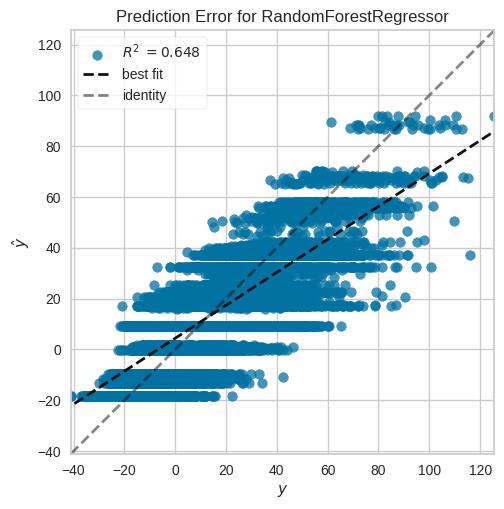

In [120]:
from yellowbrick.regressor import prediction_error

visualizar = prediction_error(modelo, X_train, y_train, X_test, y_test);

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


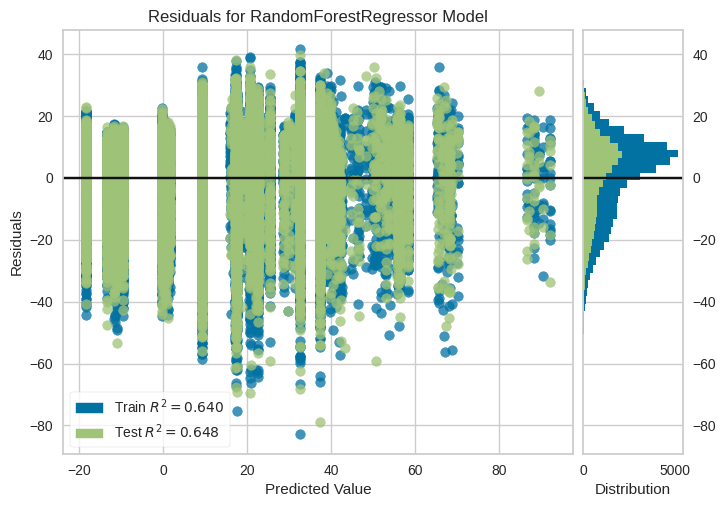

In [121]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, X_train, y_train, X_test, y_test);

## <font color='orange'>Realizando Cross Validation</font>

* La validación cruzada es una técnica robusta utilizada para evaluar el rendimiento de un modelo de aprendizaje automático. Divide el conjunto de datos en 'k' partes iguales, o 'folds', entrena el modelo en 'k-1' de estas partes y prueba el modelo en la parte restante. Este proceso se repite 'k' veces, cada vez con una parte diferente siendo utilizada como conjunto de prueba. Cada una de estas iteraciones se llama 'fold', y el promedio de la medida de rendimiento en todas las 'k' iteraciones proporciona una estimación más confiable del rendimiento del modelo.

In [124]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    '(RMSE)': 'neg_root_mean_squared_error',
    '(MAE)': 'neg_mean_absolute_error',
    'R²': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(modelo, X_train, y_train, scoring=scoring, cv=cv)
cv_resultados

{'fit_time': array([4.37608314, 3.70801878, 3.13439941, 2.79722643, 3.13322353]),
 'score_time': array([0.07607055, 0.05396676, 0.06272197, 0.0533061 , 0.07138038]),
 'test_(RMSE)': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_(MAE)': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R²': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}